<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AQI-Data-(1999---2022)" data-toc-modified-id="AQI-Data-(1999---2022)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AQI Data (1999 - 2022)</a></span></li><li><span><a href="#Green-Space-and-Tree-Canopy-Percentage-Data" data-toc-modified-id="Green-Space-and-Tree-Canopy-Percentage-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Green Space and Tree Canopy Percentage Data</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PCA</a></span><ul class="toc-item"><li><span><a href="#Cleveland,-OH" data-toc-modified-id="Cleveland,-OH-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cleveland, OH</a></span><ul class="toc-item"><li><span><a href="#Train-and-test-split" data-toc-modified-id="Train-and-test-split-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Train and test split</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>SVM</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import cm
import scipy.stats as stats
import plotly.express as px
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn import metrics
import warnings

import os
import sys

# AQI Data (1999 - 2022)

In [2]:
path = r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\all_tables.xlsx'
df = pd.read_excel(path)
df.head(5)

,Unnamed: 0,Date,PM2.5 AQI Value,City,Month,Weekday,Year
0,0,1999-01-03,46,Cleveland,January,Sunday,1999
1,1,1999-01-06,62,Cleveland,January,Wednesday,1999
2,2,1999-01-08,112,Cleveland,January,Friday,1999
3,3,1999-01-09,70,Cleveland,January,Saturday,1999
4,4,1999-01-10,82,Cleveland,January,Sunday,1999


In [3]:
# Clean df
df_clean = df[['Date', 'PM2.5 AQI Value', 'City']]
df_clean.columns

Index(['Date', 'PM2.5 AQI Value', 'City'], dtype='object')

In [4]:
# Create a copy df
copy = df_clean.copy()

# Apply log to AQI Value
copy['PM2.5 AQI Value'] = np.log(copy['PM2.5 AQI Value'])
copy

,Date,PM2.5 AQI Value,City
0,1999-01-03,3.828641,Cleveland
1,1999-01-06,4.127134,Cleveland
2,1999-01-08,4.718499,Cleveland
3,1999-01-09,4.248495,Cleveland
4,1999-01-10,4.406719,Cleveland
...,...,...,...
32215,2022-05-30,3.401197,Tampa
32216,2022-05-31,3.465736,Tampa
32217,2022-06-01,3.433987,Tampa
32218,2022-06-02,3.433987,Tampa


# Green Space and Tree Canopy Percentage Data

Recall that we ran into the limitation of not being able to save the aggregate data of all cities and saved data by city. So we'll perform modeling by city. 

# PCA

Using [scikit-learn](https://scikit-learn.org/stable/data_transforms.html), we will perform preprocessing, unsupervised dimensionality reduction (PCA), cross validation, and try different prediction modeling. Our model of interest is SVM. 

Cross validation (CV) is out-of-sample testing and it is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. CV is a resampling method that uses different portions of the data to test and train a model on different iterations.


Fit transform: Each of the *predictor variables* should be scaled to have **mean=0** and **standard deviation=1**, to make sure that no predictor variable is overly influential in the model if it happens to be measured in different units.

## Cleveland, OH

In [5]:
path0 = r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\df_cle.xlsx'
cle = pd.read_excel(path0)
cle.head(2)

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer,EnviroAtlas Community Name,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr),Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Value of mortality avoided due to ozone removed ($/yr),Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr),Percent ozone removed annually by tree cover,Percent particulate matter [PM10] removed annually by tree cover,Percent particulate matter [PM2.5] removed annually by tree cover,Percent sulfur dioxide removed annually by tree cover
0,106.5,369.0,3504,6279,119.8,214.7,35.1,31.2,"Cleveland, OH",64,0,48,4429,0,22.5,32.5,12.5,17.1
1,106.5,369.0,3504,6279,119.8,214.7,35.1,31.2,"Cleveland, OH",50,0,38,3520,0,16.3,23.5,9.2,12.4


In [6]:
cle.shape

(315288, 18)

In [7]:
# Drop any object dtype
cle = cle.drop(columns='EnviroAtlas Community Name')

### Train and test split

In [8]:
# Define X and y
X = cle[[i for i in cle.columns if i not in ["Percent particulate matter [PM2.5] removed annually by tree cover"]]]
y = cle["Percent particulate matter [PM2.5] removed annually by tree cover"]

In [9]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [10]:
print(X.shape)
print(y.shape)

(315288, 16)
(315288,)


In [11]:
print(X_train.shape)
print(y_train.shape)

(252230, 16)
(252230,)


In [12]:
#  Normalize data using StandardScaler()
scaler = StandardScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [13]:
# Return biased estimate
X_train_norm.std(ddof = 0)

Particulate matter [PM2.5] (kg/yr)                                                         1.0
Particulate matter [PM10] (kg/yr)                                                          1.0
Percent tree cover                                                                         1.0
Percent green space                                                                        1.0
Tree cover per capita (m2/person)                                                          1.0
Green space per capita (m2/person)                                                         1.0
Percent tree cover in 50m buffer                                                           1.0
Percent tree cover in 15m buffer                                                           1.0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)                1.0
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)                     1.0
Value of asthma exacerbation cases avoided due to 

In [14]:
# Return biased estimate
X_test_norm.std(ddof = 0)

Particulate matter [PM2.5] (kg/yr)                                                         0.998922
Particulate matter [PM10] (kg/yr)                                                          0.997567
Percent tree cover                                                                         0.996647
Percent green space                                                                        0.997430
Tree cover per capita (m2/person)                                                          0.988756
Green space per capita (m2/person)                                                         0.988962
Percent tree cover in 50m buffer                                                           0.998601
Percent tree cover in 15m buffer                                                           0.990397
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)                0.989285
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)                     0.987550


In [15]:
# Predictor variables scaling
pca = PCA()
X_red = pca.fit_transform(scale(X_train_norm))
# Define CV
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 123)

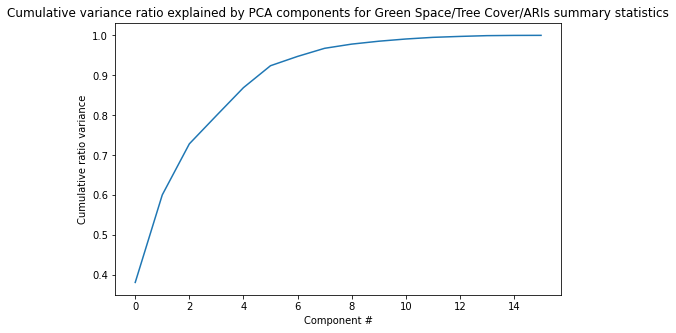

In [16]:
# Plot cumulative variance ratio 
plt.subplots(figsize=(8, 5))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Green Space/Tree Cover/ARIs summary statistics');

In [17]:
# Percent variance in response variable explained by each addition of principal component to the model
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 38.2 ,  60.1 ,  72.86,  79.93,  86.92,  92.41,  94.74,  96.77,
        97.82,  98.54,  99.09,  99.5 ,  99.74,  99.93,  99.99, 100.  ])

 - 1st principal component accounts for 38.2% of variance.
 - 2nd principal component accounts for 60.1% of variance.
 - 3rd principal component accounts for 72.86% of variance.
 - 4th principal component accounts for 79.93% of variance.
 - 5th principal component accounts for 86.92% of variance
 - nth principal component accounts for 100% of variance.

### Linear Regression

Let's look at our RMSE scores using linear regression and plot our cross-validation results

In [18]:
y_train.shape

(252230,)

In [19]:
X_train.shape

(252230, 16)

In [20]:
from sklearn import linear_model, preprocessing

lin_reg = linear_model.LinearRegression()

In [21]:
lin_reg.fit(X_train, y_train)
# Evaluate the model  
lin_reg.score(X_train, y_train)
# Use the model to make predictions about our test data
y_predict = lin_reg.predict(X_test)

In [22]:
y_predict

array([19.72692953, 19.68871318, 23.46531762, ..., 13.47412419,
       16.17608319, 16.56977742])

In [23]:
# Create and print dataframe accounting for '
# Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)' from y_predict
ARI_pred = pd.DataFrame(y_predict, columns = ['Percent particulate matter [PM2.5] removed annually by tree cover'])
ARI_pred.head()

,Percent particulate matter [PM2.5] removed annually by tree cover
0,19.726930
1,19.688713
2,23.465318
3,13.620441
4,20.216963


In [24]:
# Create dataframe for actual ARI symptoms avoided due to PM2.5 removed (cases/yr) from y_predict
ARI_actual = pd.DataFrame(y_test)
ARI_actual.head()

,Percent particulate matter [PM2.5] removed annually by tree cover
219788,20.2
11128,20.1
178951,23.6
228125,13.5
69747,20.2


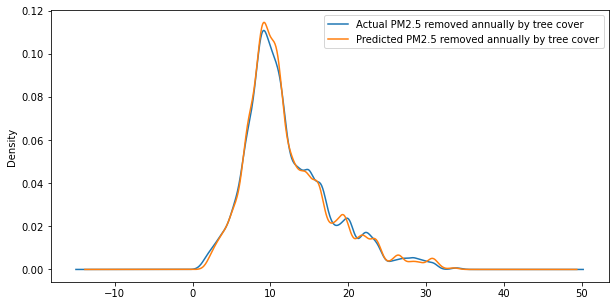

In [25]:
# Plot predicted vs actual
ax = ARI_actual.plot(kind = 'density', figsize = (10,5))
ARI_pred.plot(kind = 'density', figsize = (10,5), ax = ax)
L = plt.legend()
L.get_texts()[0].set_text('Actual PM2.5 removed annually by tree cover')
L.get_texts()[1].set_text('Predicted PM2.5 removed annually by tree cover')
plt.show()

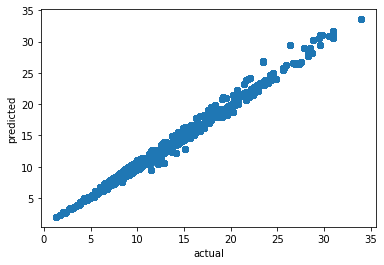

In [26]:
# Let's plot the predictions against the actual result. Use scatter()
_ = plt.scatter(y_test, y_predict)
_ = plt.xlabel("actual")
_ = plt.ylabel("predicted")
plt.show()

### SVM

In [27]:
# Perform another train and test split
X1 = cle[[i for i in cle.columns if i not in ["Percent particulate matter [PM2.5] removed annually by tree cover"]]]
y1 = cle["Percent particulate matter [PM2.5] removed annually by tree cover"]

# Train and test split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.25,random_state = 123) 

In [28]:
# Preprocess with StandardScaler()
scale = StandardScaler()

# Fit_transform for predictors
X_train1_svm = scale.fit_transform(X_train1)
X_test1_svm = scale.fit_transform(X_test1)

In [29]:
print(X_train1_svm.shape)
print(X_test1_svm.shape)

(236466, 16)
(78822, 16)


In [30]:
# Fit_transform response variables
y_train1_svm = scale.fit_transform(y_train1.to_numpy().reshape(-1,1))
y_test1_svm =  scale.fit_transform(y_test1.to_numpy().reshape(-1,1))

In [31]:
print(y_train1_svm.shape)
print(y_test1_svm.shape)

(236466, 1)
(78822, 1)


In [ ]:
# Define SVR 
svr = SVR(kernel = 'rbf')
model_svr = svr.fit(X_train1_svm, np.ravel(y_train1_svm))
y_predict1 = model_svr.predict(X_train1_svm)

In [ ]:
# Assess MSE score
score = model_svr.score(X_train1_svm,y_train1_svm)
print("Score R-squared :", score*100)
print("MSE :", mean_squared_error(y_train1_svm, y_predict1))